In [1]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from src.battery import Battery
from src.optimize import run_simulation
from src.load_data import load_data
from src.plot import display_schedule, display_profit

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)




# Battery specs :



- SOC: practical state of charge in [0,1] 
- NEC: practical nominal energy capacity (Wh)
- CR: Charging rate (W/Wh)
- DR: Discharging rate (W/Wh)





In [3]:
SOC = np.array([0, 0.01, 0.85, 1.])

# Charging curve
CR = np.array([0.25, 0.5, 0.5, 0.1])

SOC_to_CR_function = interp1d(SOC, CR)

# Discharging curve
SOC = np.array([0., 0.15, 0.99, 1.])
DR = np.array([0.1, 0.5, 0.5, 0.25])

SOC_to_DR_function = interp1d(SOC, DR)

bat = Battery(SOC_to_CR_function, SOC_to_DR_function)


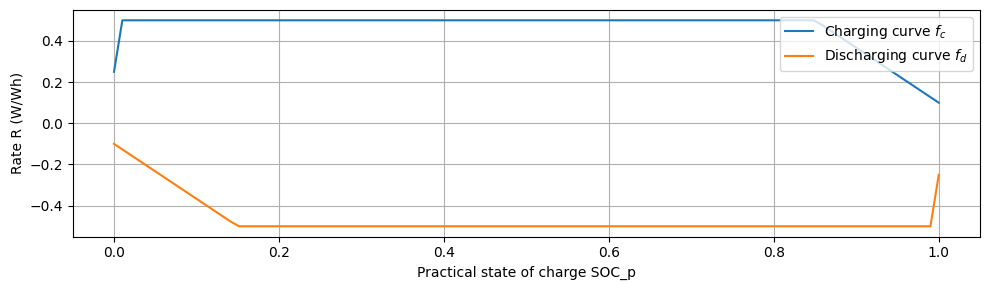

In [4]:
plt.figure(figsize=(10, 3))
plt.plot(np.linspace(0, 1, 100), SOC_to_CR_function(np.linspace(0, 1, 100)), label="Charging curve $f_c$")
plt.plot(np.linspace(0, 1, 100), -SOC_to_DR_function(np.linspace(0,1, 100)), label="Discharging curve $f_d$")
plt.grid(True)
plt.xlabel("Practical state of charge SOC_p")
plt.ylabel("Rate R (W/Wh)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig('out/charging_curve.pdf')
plt.show()


# Compute max SOC change in one hour of charge/ discharge

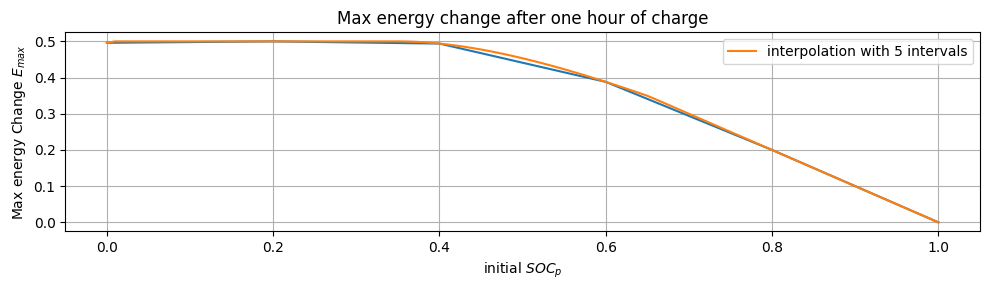

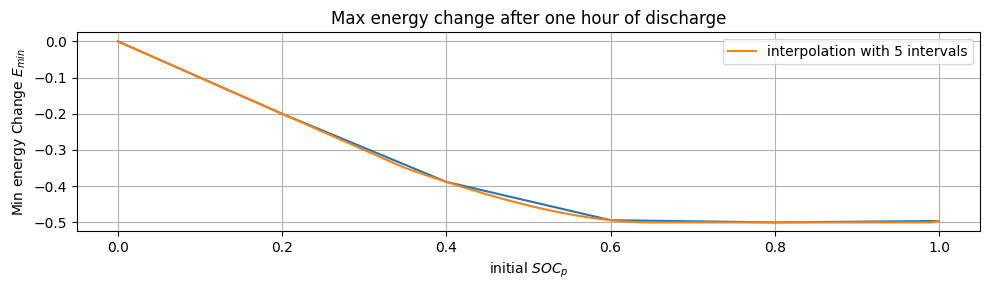

In [5]:
Nint = 5
G_c, G_d = bat.get_max_SOC_change(Nint)


Nint2 = 100
G_c2, G_d2 = bat.get_max_SOC_change(Nint2)

plt.figure(figsize=(10, 3))
plt.grid(True)
plt.plot(np.linspace(0, 1, Nint+1), G_c)
plt.plot(np.linspace(0, 1, Nint2+1), G_c2,
         label="interpolation with {} intervals".format(Nint))
plt.ylabel("Max energy Change $E_{max}$")
plt.xlabel("initial $SOC_p$")
plt.title("Max energy change after one hour of charge")
plt.legend()
plt.tight_layout()
plt.savefig("out/max_energy_change.pdf")
plt.show()


plt.figure(figsize=(10, 3))
plt.grid(True)
plt.plot(np.linspace(0, 1, Nint+1), G_d)
plt.plot(np.linspace(0, 1, Nint2+1), G_d2,
         label="interpolation with {} intervals".format(Nint))
plt.ylabel("Min energy Change $E_{min}$")
plt.xlabel("initial $SOC_p$")
plt.title("Max energy change after one hour of discharge")
plt.legend()
plt.tight_layout()
plt.savefig("out/min_energy_change.pdf")
plt.show()


# Dataset :

In [6]:
df = load_data(country="Germany", start="2021-01-01 00:00:00")
df


Country ISO3 Code           timestamp     Datetime (Local)  \
387912  Germany       DEU 2021-01-01 00:00:00  2021-01-01 01:00:00   
387913  Germany       DEU 2021-01-01 01:00:00  2021-01-01 02:00:00   
387914  Germany       DEU 2021-01-01 02:00:00  2021-01-01 03:00:00   
387915  Germany       DEU 2021-01-01 03:00:00  2021-01-01 04:00:00   
387916  Germany       DEU 2021-01-01 04:00:00  2021-01-01 05:00:00   
...         ...       ...                 ...                  ...   
405427  Germany       DEU 2022-12-31 19:00:00  2022-12-31 20:00:00   
405428  Germany       DEU 2022-12-31 20:00:00  2022-12-31 21:00:00   
405429  Germany       DEU 2022-12-31 21:00:00  2022-12-31 22:00:00   
405430  Germany       DEU 2022-12-31 22:00:00  2022-12-31 23:00:00   
405431  Germany       DEU 2022-12-31 23:00:00  2023-01-01 00:00:00   

        price_euros_wh       vgc  fgc  
387912        0.000048  0.000005    0  
387913        0.000045  0.000005    0  
387914        0.000043  0.000005    0  
387915        0.000040  0.000005    0  
387916        0.000040  0.000005    0  
...                ...       ...  ...  
405427        0.000023  0.000005    0  
405428       -0.000001  0.000005    0  
405429       -0.000001  0.000005    0  
405430        0.000025  0.000005    0  
405431       -0.000005  0.000005    0  

[17520 rows x 7 columns]

# Get Schedule with forecasted prices :

In [7]:
frame_size_forecast = 30
update_period = 1

df_pred = run_simulation(bat,
                        start = "2022-01-30 00:00:00",
                        end = "2022-12-31 00:00:00",
                        df = df,
                        forecasted=True,
                        frame_size=frame_size_forecast,
                        update_period=update_period)


Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 92.9307838
238 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 96.86881463
211 simplex iterations
1 branching nodes
absmipgap=5.68434e-14, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 100.2810346
229 simplex iterations
1 branching nodes
absmipgap=1.42109e-14, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 101.266756
218 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 103.1120438
237 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 103.4967877
226 simplex iterations
1 branching nodes
absmipgap=9.9476e-14, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 103.3722361
226 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 102.6970138
239 simplex iterations
1 branching nodes
absmipgap=2.84217e

In [8]:
display_schedule(df_pred)
display_profit(df_pred)


In [9]:
df_pred.iloc[:30]

Country ISO3 Code           timestamp     Datetime (Local)  \
397368  Germany       DEU 2022-01-30 00:00:00  2022-01-30 01:00:00   
397369  Germany       DEU 2022-01-30 01:00:00  2022-01-30 02:00:00   
397370  Germany       DEU 2022-01-30 02:00:00  2022-01-30 03:00:00   
397371  Germany       DEU 2022-01-30 03:00:00  2022-01-30 04:00:00   
397372  Germany       DEU 2022-01-30 04:00:00  2022-01-30 05:00:00   
397373  Germany       DEU 2022-01-30 05:00:00  2022-01-30 06:00:00   
397374  Germany       DEU 2022-01-30 06:00:00  2022-01-30 07:00:00   
397375  Germany       DEU 2022-01-30 07:00:00  2022-01-30 08:00:00   
397376  Germany       DEU 2022-01-30 08:00:00  2022-01-30 09:00:00   
397377  Germany       DEU 2022-01-30 09:00:00  2022-01-30 10:00:00   
397378  Germany       DEU 2022-01-30 10:00:00  2022-01-30 11:00:00   
397379  Germany       DEU 2022-01-30 11:00:00  2022-01-30 12:00:00   
397380  Germany       DEU 2022-01-30 12:00:00  2022-01-30 13:00:00   
397381  Germany       DEU 2022-01-30 13:00:00  2022-01-30 14:00:00   
397382  Germany       DEU 2022-01-30 14:00:00  2022-01-30 15:00:00   
397383  Germany       DEU 2022-01-30 15:00:00  2022-01-30 16:00:00   
397384  Germany       DEU 2022-01-30 16:00:00  2022-01-30 17:00:00   
397385  Germany       DEU 2022-01-30 17:00:00  2022-01-30 18:00:00   
397386  Germany       DEU 2022-01-30 18:00:00  2022-01-30 19:00:00   
397387  Germany       DEU 2022-01-30 19:00:00  2022-01-30 20:00:00   
397388  Germany       DEU 2022-01-30 20:00:00  2022-01-30 21:00:00   
397389  Germany       DEU 2022-01-30 21:00:00  2022-01-30 22:00:00   
397390  Germany       DEU 2022-01-30 22:00:00  2022-01-30 23:00:00   
397391  Germany       DEU 2022-01-30 23:00:00  2022-01-31 00:00:00   
397392  Germany       DEU 2022-01-31 00:00:00  2022-01-31 01:00:00   
397393  Germany       DEU 2022-01-31 01:00:00  2022-01-31 02:00:00   
397394  Germany       DEU 2022-01-31 02:00:00  2022-01-31 03:00:00   
397395  Germany       DEU 2022-01-31 03:00:00  2022-01-31 04:00:00   
397396  Germany       DEU 2022-01-31 04:00:00  2022-01-31 05:00:00   
397397  Germany       DEU 2022-01-31 05:00:00  2022-01-31 06:00:00   

        price_euros_wh       vgc  fgc  n_cycles       eff             NEC  \
397368        0.000004  0.000005    0  0.000000  0.990000  1000000.000000   
397369        0.000010  0.000005    0  0.000000  0.990000  1000000.000000   
397370        0.000010  0.000005    0  0.000000  0.990000  1000000.000000   
397371        0.000010  0.000005    0  0.000000  0.990000  1000000.000000   
397372        0.000011  0.000005    0  0.000000  0.990000  1000000.000000   
397373        0.000004  0.000005    0  0.000000  0.990000  1000000.000000   
397374        0.000010  0.000005    0  0.000000  0.990000  1000000.000000   
397375        0.000011  0.000005    0  0.000000  0.990000  1000000.000000   
397376        0.000012  0.000005    0  0.000000  0.990000  1000000.000000   
397377        0.000011  0.000005    0  0.000000  0.990000  1000000.000000   
397378        0.000012  0.000005    0  0.000000  0.990000  1000000.000000   
397379        0.000010  0.000005    0  0.000000  0.990000  1000000.000000   
397380        0.000010  0.000005    0  0.000000  0.990000  1000000.000000   
397381        0.000012  0.000005    0  0.000000  0.990000  1000000.000000   
397382        0.000014  0.000005    0  0.000000  0.990000  1000000.000000   
397383        0.000060  0.000005    0  0.000000  0.990000  1000000.000000   
397384        0.000172  0.000005    0  0.000000  0.990000  1000000.000000   
397385        0.000158  0.000005    0  0.000000  0.990000  1000000.000000   
397386        0.000163  0.000005    0  0.000000  0.990000  1000000.000000   
397387        0.000158  0.000005    0  0.000000  0.990000  1000000.000000   
397388        0.000158  0.000005    0  0.000000  0.990000  1000000.000000   
397389        0.000160  0.000005    0  0.000000  0.990000  1000000.000000   
397390        0.000144  0.000005    0  0.000000  0.990000  1000000

# Get Schedule with true prices :

In [10]:
frame_size_forecast = 30
update_period = 1

df_optim = run_simulation(bat,
                        start = "2022-01-30 00:00:00",
                        end = "2022-12-31 00:00:00",
                        df = df,
                        forecasted=False,
                        frame_size=frame_size_forecast,
                        update_period=update_period)


Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 151.2049873
232 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 177.2363114
196 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 72.1404065
146 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 243.6251178
194 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 79.38010905
210 simplex iterations
1 branching nodes
absmipgap=1.42109e-14, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 77.94893504
201 simplex iterations
1 branching nodes
absmipgap=1.42109e-14, relmipgap=0
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 122.2630609
262 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; objective 120.3067197
254 simplex iterations
1 branching nodes
Gurobi 10.0.0:Gurobi 10.0.0: optimal solution; obje

In [11]:
display_schedule(df_optim)
display_profit(df_optim)


In [12]:
df_optim

Country ISO3 Code           timestamp     Datetime (Local)  \
397368  Germany       DEU 2022-01-30 00:00:00  2022-01-30 01:00:00   
397369  Germany       DEU 2022-01-30 01:00:00  2022-01-30 02:00:00   
397370  Germany       DEU 2022-01-30 02:00:00  2022-01-30 03:00:00   
397371  Germany       DEU 2022-01-30 03:00:00  2022-01-30 04:00:00   
397372  Germany       DEU 2022-01-30 04:00:00  2022-01-30 05:00:00   
...         ...       ...                 ...                  ...   
405403  Germany       DEU 2022-12-30 19:00:00  2022-12-30 20:00:00   
405404  Germany       DEU 2022-12-30 20:00:00  2022-12-30 21:00:00   
405405  Germany       DEU 2022-12-30 21:00:00  2022-12-30 22:00:00   
405406  Germany       DEU 2022-12-30 22:00:00  2022-12-30 23:00:00   
405407  Germany       DEU 2022-12-30 23:00:00  2022-12-31 00:00:00   

        price_euros_wh       vgc  fgc    n_cycles       eff             NEC  \
397368    4.490000e-06  0.000005    0    0.000000  0.990000  1000000.000000   
397369    1.008000e-05  0.000005    0    0.000000  0.990000  1000000.000000   
397370    1.001000e-05  0.000005    0    0.000000  0.990000  1000000.000000   
397371    1.015000e-05  0.000005    0    0.000000  0.990000  1000000.000000   
397372    1.137000e-05  0.000005    0    0.000000  0.990000  1000000.000000   
...                ...       ...  ...         ...       ...             ...   
405403    2.630000e-06  0.000005    0  717.034832  0.954507   964148.258405   
405404    6.900000e-07  0.000005    0  717.034832  0.954507   964148.258405   
405405    4.000000e-07  0.000005    0  717.034832  0.954507   964148.258405   
405406    3.616000e-05  0.000005    0  717.034832  0.954507   964148.258405   
405407   -3.000000e-08  0.000005    0  717.034832  0.954507   964148.258405   

        ...       schedule       capacity        SOC  charge_energy  \
397368  ...  496088.912253       0.000000   0.000000  496088.912253   
397369  ...       0.000000  496088.912253  49.608891       0.000000   
397370  ...       0.000000  496088.912253  49.608891       0.000000   
397371  ...       0.000000  496088.912253  49.608891       0.000000   
397372  ...       0.000000  496088.912253  49.608891       0.000000   
...     ...            ...            ...        ...            ...   
405403  ...       0.000000       0.010000   0.000001       0.000000   
405404  ...   98264.096756       0.010000   0.000001   98264.096756   
405405  ...  480224.858287   98264.106756  10.191805  480224.858287   
405406  ... -476195.357376  578488.965043  60.000001       0.000000   
405407  ... -102293.597667  102293.607667  10.609738       0.000000   

        discharge_energy  electricity_revenue  grid_cost  variable_grid_cost  \
397368         -0.000000            -2.227439   2.480445            2.480445   
397369         -0.000000            -0.000000   0.000000            0.000000   
397370         -0.000000            -0.000000   0.000000            0.000000   
397371         -0.000000            -0.000000   0.000000            0.000000   
397372         -0.000000            -0.000000   0.000000            0.000000   
...                  ...                  ...        ...                 ...   
405403         -0.000000            -0.000000   0.000000            0.000000   
405404         -0.000000            -0.067802   0.491320            0.491320   
405405         -0.000000            -0.192090   2.401124            2.401124   
405406     454531.695229            16.435866   2.272658            2.272658   
405407      97639.932097            -0.002929   0.488200            0.488200   

        fixed_grid_cost  hourly_profit  
397368                0      -4.707884  
397369                0      -0.000000  
397370                0      -0.000000  
397371                0      -0.000000  
397372                0      -0.000000  
...                 ...            ...  
405403                0      -0.000000  
405404                0      -0.559123  
405405                0      -2.593